1. Import seluruh library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

from sklearn.preprocessing import MinMaxScaler


2. Download dataset dan unzip filenya

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "Global Population Trends(2016-2022)"

ref                                           title                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------  -----------------------------------  ----  -------------------  -------------  ---------  ---------------  
alitaqi000/global-population-trends2016-2022  Global Population Trends(2016-2022)  32KB  2023-08-28 12:53:06            782         18  1.0              


In [ ]:
!kaggle datasets download -d alitaqi000/global-population-trends2016-2022

  0% 0.00/31.7k [00:00<?, ?B/s]
100% 31.7k/31.7k [00:00<00:00, 32.0MB/s]


In [ ]:
zip_ref = zipfile.ZipFile("/content/global-population-trends2016-2022.zip", 'r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()

In [ ]:
df = pd.read_csv("/content/sample_data/Global Population Trends(2016-2022).csv")
df.head()

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
0,Afghanistan,2017,-,-,-,55,63.0,37.342,7.027,5.129,49.4,-
1,Afghanistan,2018,"36,686,784","9,353,296","27,333,488",56,63.0,36.927,6.981,5.002,47.8,3.0
2,Afghanistan,2019,"37,769,499","9,727,157","28,042,342",58,64.0,36.466,6.791,4.87,46.3,3.0
3,Afghanistan,2020,"38,972,230","10,142,913","28,829,317",60,63.0,36.051,7.113,4.75,44.8,3.0
4,Afghanistan,2021,"40,099,462","10,551,772","29,547,690",-,62.0,35.842,7.344,4.643,43.4,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                1073 non-null   object 
 1   Year                   1073 non-null   int64  
 2   Total Population       1073 non-null   object 
 3   Urban Population       1073 non-null   object 
 4   Rural Population       1073 non-null   object 
 5   Population Density     1073 non-null   object 
 6   Life Expectancy        1073 non-null   object 
 7   Birth Rate             1073 non-null   float64
 8   Death Rate             1073 non-null   float64
 9   Fertility Rate         1073 non-null   object 
 10  Infant Mortality Rate  1073 non-null   object 
 11  Growth Rate            1073 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 100.7+ KB


3. Mengganti semua value "-" dengan NaN

In [ ]:
df.replace("-", np.nan, inplace=True)
for i in df.columns[2:]:
    df[i] = df[i].astype(str)
    df[i] = df[i].str.replace(',', '').astype("float64")
    df[i].fillna(df[i].mean(), inplace=True)

In [ ]:
df

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
0,Afghanistan,2017,3.577942e+07,2.014323e+07,1.674451e+07,55.000000,63.0,37.342,7.027,5.129,49.4,1.009259
1,Afghanistan,2018,3.668678e+07,9.353296e+06,2.733349e+07,56.000000,63.0,36.927,6.981,5.002,47.8,3.000000
2,Afghanistan,2019,3.776950e+07,9.727157e+06,2.804234e+07,58.000000,64.0,36.466,6.791,4.870,46.3,3.000000
3,Afghanistan,2020,3.897223e+07,1.014291e+07,2.882932e+07,60.000000,63.0,36.051,7.113,4.750,44.8,3.000000
4,Afghanistan,2021,4.009946e+07,1.055177e+07,2.954769e+07,421.001176,62.0,35.842,7.344,4.643,43.4,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1068,Zimbabwe,2017,3.577942e+07,2.014323e+07,1.674451e+07,38.000000,61.0,32.516,8.266,3.706,39.5,1.009259
1069,Zimbabwe,2018,1.505218e+07,4.848158e+06,1.020403e+07,39.000000,61.0,32.074,7.972,3.659,38.0,2.000000
1070,Zimbabwe,2019,1.535461e+07,4.945719e+06,1.040889e+07,40.000000,61.0,31.518,8.043,3.599,37.1,2.000000
1071,Zimbabwe,2020,1.566967e+07,5.052214e+06,1.061745e+07,41.000000,61.0,31.009,8.132,3.545,36.6,2.000000


In [ ]:
pd.DataFrame(df.dtypes)

,0
Country,object
Year,int64
Total Population,float64
Urban Population,float64
Rural Population,float64
Population Density,float64
Life Expectancy,float64
Birth Rate,float64
Death Rate,float64
Fertility Rate,float64


In [ ]:
for i in range(len(df.columns)):
    print(f"{df.columns[i]} memiliki type data = {df.dtypes[i]}")

Country memiliki type data = object
Year memiliki type data = int64
Total Population memiliki type data = float64
Urban Population memiliki type data = float64
Rural Population memiliki type data = float64
Population Density memiliki type data = float64
Life Expectancy memiliki type data = float64
Birth Rate memiliki type data = float64
Death Rate memiliki type data = float64
Fertility Rate memiliki type data = float64
Infant Mortality Rate memiliki type data = float64
Growth Rate memiliki type data = float64


In [ ]:
baris, kolom = df.shape
print(f"Kolom = {kolom} dan baris = {baris}")

Kolom = 12 dan baris = 1073


In [ ]:
df[["Total Population", "Country"]]

,Total Population,Country
0,3.577942e+07,Afghanistan
1,3.668678e+07,Afghanistan
2,3.776950e+07,Afghanistan
3,3.897223e+07,Afghanistan
4,4.009946e+07,Afghanistan
...,...,...
1068,3.577942e+07,Zimbabwe
1069,1.505218e+07,Zimbabwe
1070,1.535461e+07,Zimbabwe
1071,1.566967e+07,Zimbabwe


In [ ]:
df.iloc[0:10]

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
0,Afghanistan,2017,3.577942e+07,2.014323e+07,1.674451e+07,55.000000,63.0,37.342,7.027,5.129,49.4,1.009259
1,Afghanistan,2018,3.668678e+07,9.353296e+06,2.733349e+07,56.000000,63.0,36.927,6.981,5.002,47.8,3.000000
2,Afghanistan,2019,3.776950e+07,9.727157e+06,2.804234e+07,58.000000,64.0,36.466,6.791,4.870,46.3,3.000000
3,Afghanistan,2020,3.897223e+07,1.014291e+07,2.882932e+07,60.000000,63.0,36.051,7.113,4.750,44.8,3.000000
4,Afghanistan,2021,4.009946e+07,1.055177e+07,2.954769e+07,421.001176,62.0,35.842,7.344,4.643,43.4,3.000000
5,Albania,2017,3.577942e+07,2.014323e+07,1.674451e+07,105.000000,79.0,10.870,8.150,1.491,8.3,1.009259
6,Albania,2018,2.866376e+06,1.728969e+06,1.137407e+06,105.000000,79.0,10.517,8.308,1.440,8.3,0.000000
7,Albania,2019,2.854191e+06,1.747593e+06,1.106598e+06,104.000000,79.0,10.343,8.480,1.414,8.4,0.000000
8,Albania,2020,2.837849e+06,1.762645e+06,1.075204e+06,104.000000,77.0,10.285,10.785,1.400,8.4,-1.000000
9,Albania,2021,2.811666e+06,1.770478e+06,1.041188e+06,421.001176,76.0,10.240,11.325,1.390,8.4,-1.000000


In [ ]:
df[["Total Population", "Country"]].iloc[11:16]

,Total Population,Country
11,41927007.0,Algeria
12,42705368.0,Algeria
13,43451666.0,Algeria
14,44177969.0,Algeria
15,48424.0,American Samoa


In [ ]:
df.head(8)

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
0,Afghanistan,2017,3.577942e+07,2.014323e+07,1.674451e+07,55.000000,63.0,37.342,7.027,5.129,49.4,1.009259
1,Afghanistan,2018,3.668678e+07,9.353296e+06,2.733349e+07,56.000000,63.0,36.927,6.981,5.002,47.8,3.000000
2,Afghanistan,2019,3.776950e+07,9.727157e+06,2.804234e+07,58.000000,64.0,36.466,6.791,4.870,46.3,3.000000
3,Afghanistan,2020,3.897223e+07,1.014291e+07,2.882932e+07,60.000000,63.0,36.051,7.113,4.750,44.8,3.000000
4,Afghanistan,2021,4.009946e+07,1.055177e+07,2.954769e+07,421.001176,62.0,35.842,7.344,4.643,43.4,3.000000
5,Albania,2017,3.577942e+07,2.014323e+07,1.674451e+07,105.000000,79.0,10.870,8.150,1.491,8.3,1.009259
6,Albania,2018,2.866376e+06,1.728969e+06,1.137407e+06,105.000000,79.0,10.517,8.308,1.440,8.3,0.000000
7,Albania,2019,2.854191e+06,1.747593e+06,1.106598e+06,104.000000,79.0,10.343,8.480,1.414,8.4,0.000000


In [ ]:
df.tail(3)

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
1070,Zimbabwe,2019,15354608.0,4945719.0,10408889.0,40.000000,61.0,31.518,8.043,3.599,37.1,2.0
1071,Zimbabwe,2020,15669666.0,5052214.0,10617452.0,41.000000,61.0,31.009,8.132,3.545,36.6,2.0
1072,Zimbabwe,2021,15993524.0,5166388.0,10827136.0,421.001176,59.0,30.537,9.057,3.491,35.7,2.0


In [ ]:
df.describe(include='all')

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
count,1073,1073.000000,1.073000e+03,1.073000e+03,1.073000e+03,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
unique,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2019.013048,3.577942e+07,2.014323e+07,1.674451e+07,421.001176,72.228927,18.801519,7.841907,2.557590,20.674588,1.009259
std,NaN,1.410190,1.250692e+08,6.473225e+07,6.605541e+07,1695.633903,8.639887,9.903449,2.973418,1.274532,18.131003,1.196203
min,NaN,2017.000000,1.086500e+04,5.474000e+03,8.030000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
25%,NaN,2018.000000,1.884490e+06,1.158811e+06,7.493100e+05,50.000000,67.000000,10.620000,6.067000,1.595000,6.000000,0.000000
50%,NaN,2019.000000,1.092872e+07,6.454827e+06,6.962996e+06,139.000000,73.000000,16.025000,7.396000,2.110000,15.600000,1.000000
75%,NaN,2020.000000,3.577942e+07,2.014323e+07,1.674451e+07,421.001176,78.000000,25.921000,9.313000,3.237000,29.400000,2.000000


<ipython-input-20-9a6aac02d742>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", )


<Axes: >

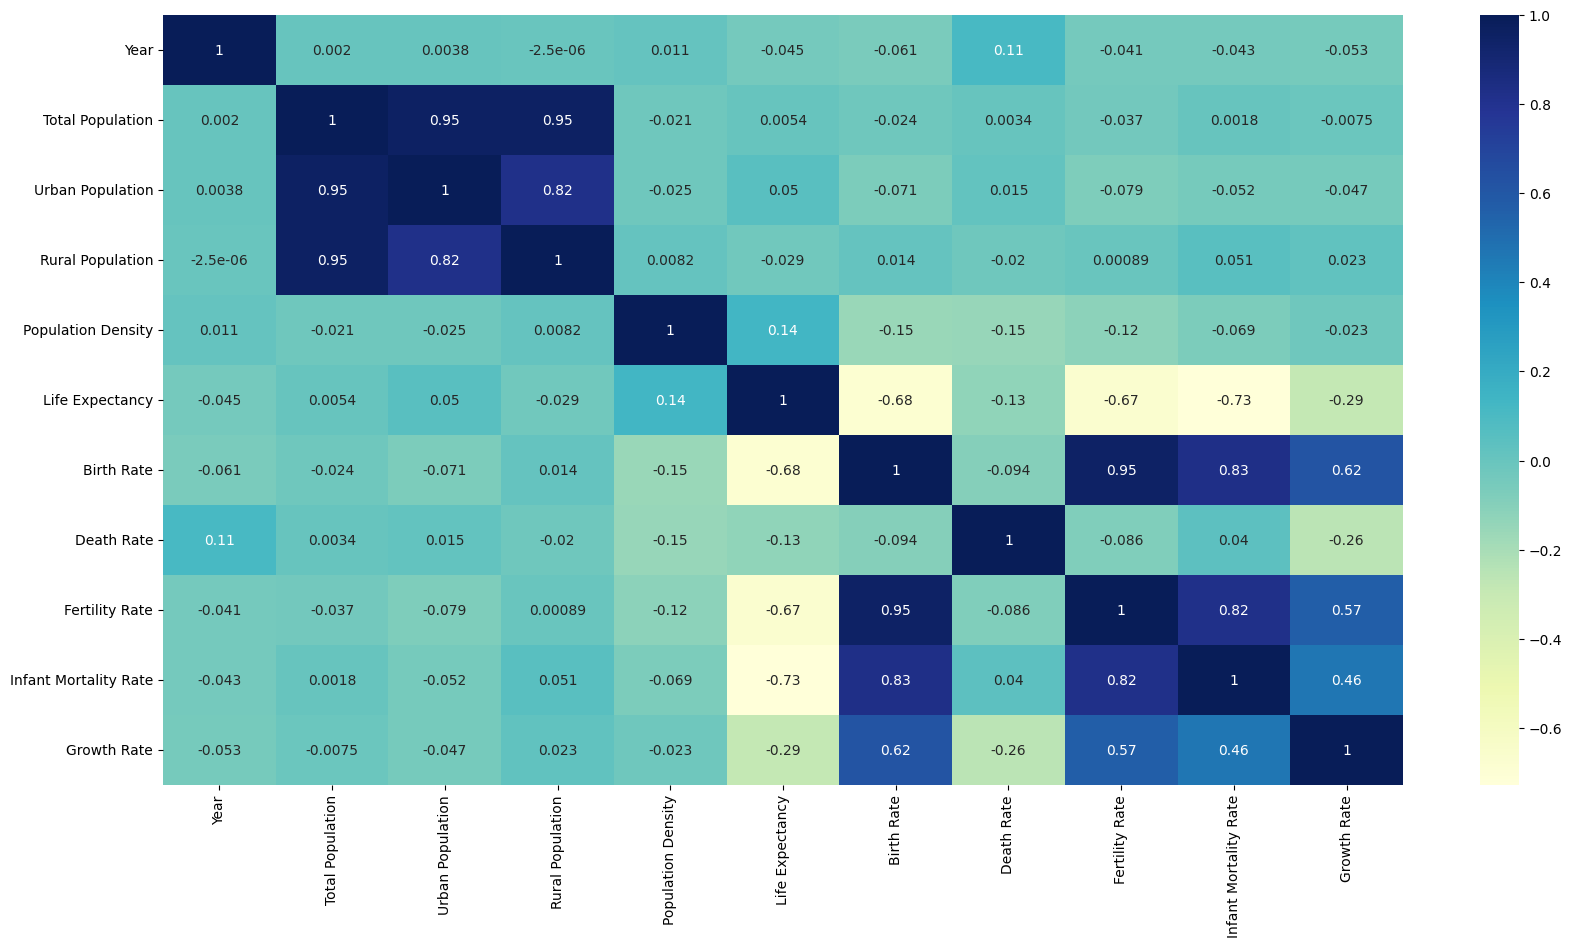

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", )

In [ ]:
df.corr().query("`Total Population` > 0.2").iloc[::,1:4]

<ipython-input-149-4abaa5e63c79>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().query("`Total Population` > 0.2").iloc[::,1:4]


,Total Population,Urban Population,Rural Population
Total Population,1.000000,0.954181,0.95463
Urban Population,0.954181,1.000000,0.82400
Rural Population,0.954630,0.824000,1.00000


In [ ]:
filtered = df.corr().query("`Growth Rate` > 0.2").iloc[::,8:]
filtered

<ipython-input-151-d348d7f30208>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtered = df.corr().query("`Growth Rate` > 0.2").iloc[::,8:]


,Fertility Rate,Infant Mortality Rate,Growth Rate
Birth Rate,0.950276,0.828479,0.619613
Fertility Rate,1.000000,0.821284,0.567155
Infant Mortality Rate,0.821284,1.000000,0.461081
Growth Rate,0.567155,0.461081,1.000000


In [ ]:
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(df[filtered.index])
norm_data = pd.DataFrame(norm_data, columns=filtered.index)

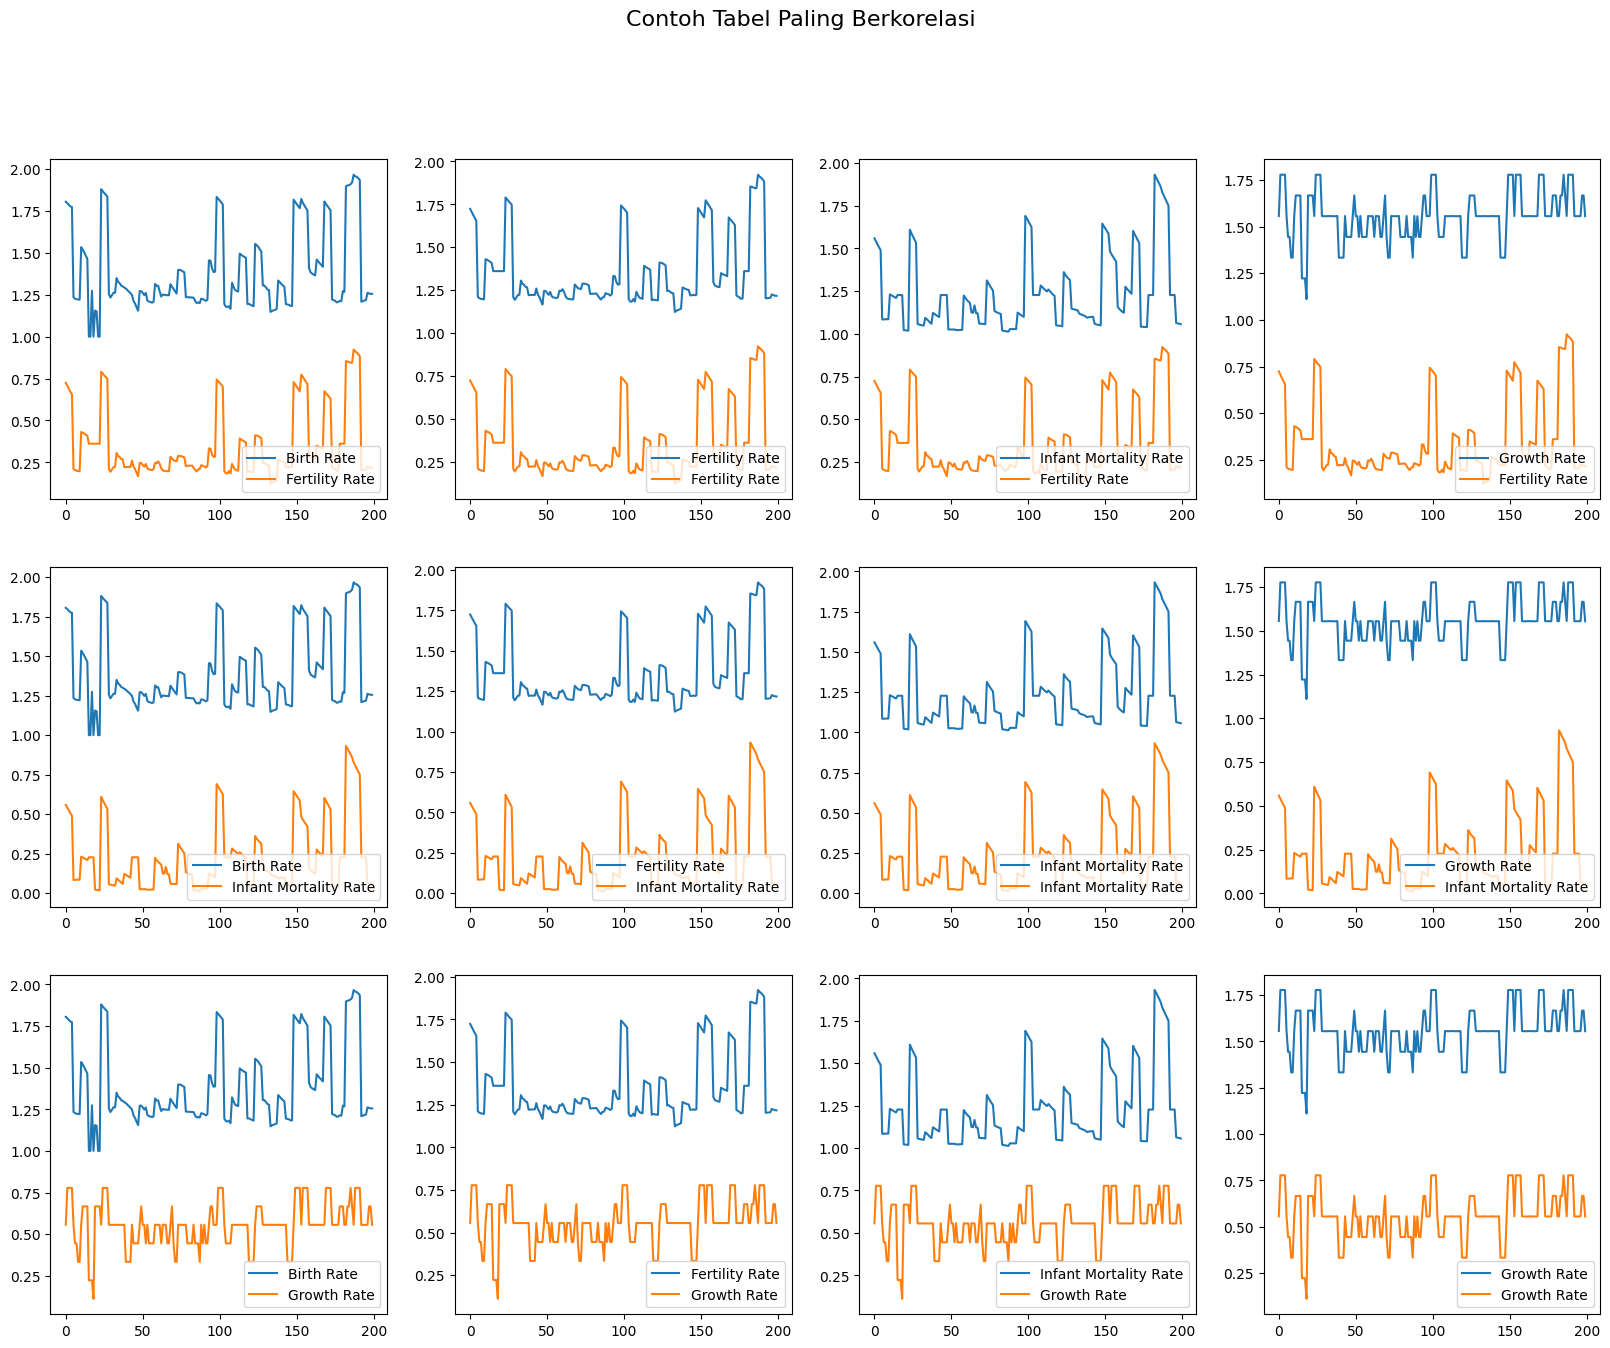

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle("Contoh Tabel Paling Berkorelasi", fontsize=16)

kolom, baris = 0,0

for i in filtered.columns:
    for y in filtered.index:
        x = [i for i in range(200)]
        ax[kolom, baris].plot(x , norm_data[y].head(200) + 1)
        ax[kolom, baris].plot(x , norm_data[i].head(200))
        ax[kolom, baris].legend([f'{y}', f'{i}'], loc='lower right')
        baris += 1

    kolom += 1
    baris = 0

plt.show()

Berdasarkan data korelasi tiap kolom pada data diatas, tingkat kesuburan sangat mempengaruhi kelahiran dan kematian bayi. Jumlah penduduk di pedesaan dan kota tentu saja akan sangat mempengaruhi total populasi pada sebuah negara.

In [ ]:
df.corr().loc['Year', "Death Rate"]

<ipython-input-21-4a471427c321>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['Year', "Death Rate"]


0.11076592465397136

In [ ]:
df["Country"].describe()

count            1073
unique            216
top       Afghanistan
freq                5
Name: Country, dtype: object

In [ ]:
pd.DataFrame(df.mean())

<ipython-input-23-53c9c07e1a87>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df.mean())


,0
Year,2.019013e+03
Total Population,3.577942e+07
Urban Population,2.014323e+07
Rural Population,1.674451e+07
Population Density,4.210012e+02
Life Expectancy,7.222893e+01
Birth Rate,1.880152e+01
Death Rate,7.841907e+00
Fertility Rate,2.557590e+00
Infant Mortality Rate,2.067459e+01


In [ ]:
df[["Total Population", "Urban Population"]].min()

Total Population    10865.0
Urban Population     5474.0
dtype: float64

In [ ]:
pd.DataFrame(df.groupby("Country")["Total Population"].mean())

,Total Population
Country,
Afghanistan,3.786148e+07
Albania,9.429900e+06
Algeria,4.160829e+07
American Samoa,4.674225e+04
Andorra,7.702250e+04
...,...
Virgin Islands (U.S.),7.241049e+06
West Bank And Gaza,1.095197e+07
Yemen,3.267646e+07


In [ ]:
pd.DataFrame(df["Country"].value_counts())

,Country
Afghanistan,5
Netherlands,5
New Zealand,5
Nicaragua,5
Niger,5
...,...
Monaco,4
Cayman Islands,4
Andorra,4
American Samoa,4


In [ ]:
df.nunique()

Country                  216
Year                       5
Total Population         865
Urban Population         856
Rural Population         817
Population Density       350
Life Expectancy           36
Birth Rate               844
Death Rate               840
Fertility Rate           774
Infant Mortality Rate    438
Growth Rate               11
dtype: int64

In [ ]:
pd.DataFrame(df["Year"].value_counts())

,Year
2018,216
2019,216
2020,216
2021,216
2017,209
